# Data Prep
<font size=4 color='blue'>Project: Congressional Data Scrape and Validation</font>
***

**Project Summary:**  
The Resume of Congressional Activity has been published annually since 1947. PDF versions of this document are available for download from several US government websites, including <a href="https://senate.gov">senate.gov</a>. The primary goal of this project is to scrape the data from these documents and create a dataset that can be used for analysis.


**Notebook Scope:**  
This notebook reads formatted data from Excel and prepares the data for validation. 

**Output:**  
Scrubbed data is saved to an Excel file for further validation and analysis.

***
# Notebook Setup
***

In [39]:
# Import libraries
import os
import pandas as pd
import re
import matplotlib as mp
import matplotlib.pyplot as plt

In [2]:
%%html
<!-- Prevent text wrappping in dataframe displays for a cleaner print -->
<style> .dataframe td {white-space: nowrap;}</style>

***
# Read General Data
***

In [3]:
# Read in scrubbed legislative activity data and preview
leg_act_df = pd.read_excel('../data/general_legislative_data.xlsx')
leg_act_df.head()

,Chamber,Congress,Session,Start Date,End Date,Days in session,Time in session,Pages of proceedings,Extensions of remarks,Public bills enacted into law,...,"Measures introduced, Joint resolutions","Measures introduced, Concurrent resolutions","Measures introduced, Simple resolutions",Quorum calls,Yea-and-nay votes,Recorded votes,Bills vetoed,Vetoes overridden,Bills through conference,Bills not signed
0,Senate,100,1,1989-01-03,1989-11-22,170.0,1214:52,18660.0,NaN,96.0,...,239.0,95.0,353.0,36.0,420.0,NaN,1.0,2.0,NaN,NaN
1,House,100,1,1989-01-03,1989-11-22,169.0,909:57,13078.0,NaN,144.0,...,437.0,235.0,345.0,23.0,234.0,254.0,2.0,2.0,NaN,NaN
2,Total,100,1,1989-01-03,1989-11-22,NaN,NaN,31738.0,5016.0,240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
3,Senate,100,2,1988-01-25,1988-10-22,137.0,1126:52,17397.0,NaN,193.0,...,156.0,74.0,166.0,26.0,379.0,NaN,6.0,NaN,NaN,NaN
4,House,100,2,1988-01-25,1988-10-22,129.0,749:01,11290.0,NaN,280.0,...,241.0,163.0,263.0,14.0,308.0,143.0,10.0,NaN,NaN,NaN


***
## Handle Missing Data
***

In [4]:
# Verify that the Chmaber, Congress, Session, Start Date, and End Date columns do not have any missing data
id_cols = ['Chamber', 'Congress', 'Session', 'Start Date', 'End Date']
leg_act_df[id_cols].isna().sum()

Chamber       0
Congress      0
Session       0
Start Date    0
End Date      0
dtype: int64

In [5]:
# For all other columns, NaN can be assumed to be zero
leg_act_df.fillna(0, inplace=True)

In [6]:
leg_act_df.head()

,Chamber,Congress,Session,Start Date,End Date,Days in session,Time in session,Pages of proceedings,Extensions of remarks,Public bills enacted into law,...,"Measures introduced, Joint resolutions","Measures introduced, Concurrent resolutions","Measures introduced, Simple resolutions",Quorum calls,Yea-and-nay votes,Recorded votes,Bills vetoed,Vetoes overridden,Bills through conference,Bills not signed
0,Senate,100,1,1989-01-03,1989-11-22,170.0,1214:52,18660.0,0.0,96.0,...,239.0,95.0,353.0,36.0,420.0,0.0,1.0,2.0,0.0,0.0
1,House,100,1,1989-01-03,1989-11-22,169.0,909:57,13078.0,0.0,144.0,...,437.0,235.0,345.0,23.0,234.0,254.0,2.0,2.0,0.0,0.0
2,Total,100,1,1989-01-03,1989-11-22,0.0,0,31738.0,5016.0,240.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
3,Senate,100,2,1988-01-25,1988-10-22,137.0,1126:52,17397.0,0.0,193.0,...,156.0,74.0,166.0,26.0,379.0,0.0,6.0,0.0,0.0,0.0
4,House,100,2,1988-01-25,1988-10-22,129.0,749:01,11290.0,0.0,280.0,...,241.0,163.0,263.0,14.0,308.0,143.0,10.0,0.0,0.0,0.0


***
## Data Integrity
***

In [7]:
# Integrity Check: Congress data should range from 98 to 117
cong_min = leg_act_df['Congress'].min()
cong_max = leg_act_df['Congress'].max()
print(f'Congress range: {cong_min} to {cong_max}')

Congress range: 98 to 117


In [8]:
# Integrity Check: There should be 6 rows for each Congress
con_counts = leg_act_df['Congress'].value_counts()
con_counts.unique()

array([6], dtype=int64)

In [9]:
# Integrity Check: Chamber should contain House, Senate, or Total, with 40 rows each
leg_act_df['Chamber'].value_counts()

Chamber
Senate    40
House     40
Total     40
Name: count, dtype: int64

In [10]:
# Integrity Check: Dates should range from 1983 to 2023
cong_min = leg_act_df['Start Date'].min()
cong_max = leg_act_df['Start Date'].max()
print(f'Start Date range: {cong_min.year} to {cong_max.year}')
cong_min = leg_act_df['End Date'].min()
cong_max = leg_act_df['End Date'].max()
print(f'End Date range: {cong_min.year} to {cong_max.year}')

Start Date range: 1983 to 2022
End Date range: 1983 to 2023


In [11]:
# Integrity Check: Days in session should not exceed 365 for Senate or House
no_totals_df = leg_act_df[leg_act_df['Chamber'] != 'Total']
print(f'Days in Session max: {int(no_totals_df['Days in session'].max())}')

Days in Session max: 211


In [12]:
# Hours in session cannot exceed days in session x 24 for Senate or House
temp_df = no_totals_df[['Congress', 'Session', 'Days in session', 'Time in session']].copy()
temp_df['Hours in session'] = temp_df['Time in session'].str.split(':').str[0]
temp_df['Check'] = temp_df['Days in session'].astype(int) * 24
temp_df = temp_df[temp_df['Check'] < temp_df['Hours in session'].astype(int)]
if len(temp_df) == 0:
    print('All Hours in Session values are below the max threshold.')
else:
    display(temp_df)

All Hours in Session values are below the max threshold.


***
## Check for Outliers
***

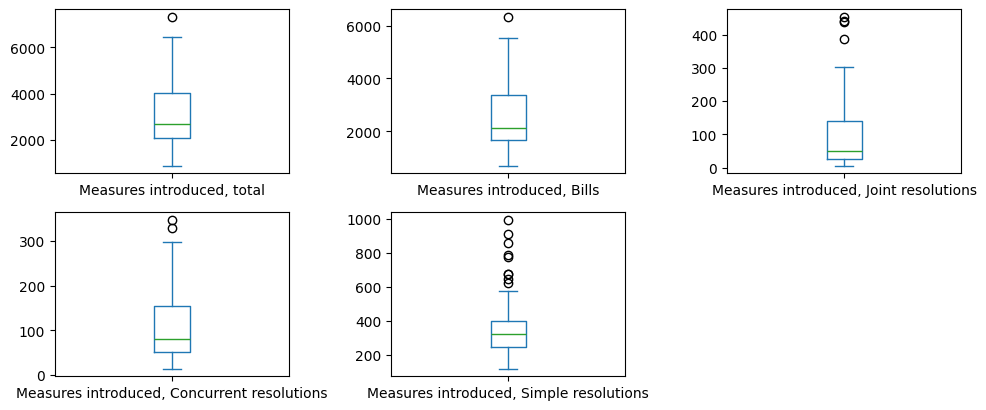

In [162]:
# Check for data outliers - Measures Introduced
cols_to_plot = no_totals_df[no_totals_df.columns[no_totals_df.columns.str.startswith('Measures introduced')]].columns.to_list()
no_totals_df[cols_to_plot].plot(kind='box', subplots=True, layout=(3,3), figsize=(10,6))
plt.tight_layout()
plt.show()

In [167]:
# Take a closer look at the numbers
no_totals_df[cols_to_plot].describe().astype('int')

,"Measures introduced, total","Measures introduced, Bills","Measures introduced, Joint resolutions","Measures introduced, Concurrent resolutions","Measures introduced, Simple resolutions"
count,80,80,80,80,80
mean,3024,2450,99,109,359
std,1428,1210,106,81,182
min,860,687,4,14,116
25%,2081,1661,27,51,244
50%,2668,2108,50,80,324
75%,4003,3375,140,155,395
max,7335,6343,454,348,996


In [124]:
# Review outliers in Measures introduced, total column
temp_df = no_totals_df.sort_values('Measures introduced, total', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures introduced, total']].head()

,Congress,Session,"Measures introduced, total"
103,117,1,7335.0
97,116,1,6467.0
61,110,1,6194.0
55,109,1,5703.0
67,111,1,5699.0


In [126]:
# Review outliers in Measures introduced, Bills columns
temp_df = no_totals_df.sort_values('Measures introduced, Bills', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures introduced, Bills']].head()

,Congress,Session,"Measures introduced, Bills"
103,117,1,6343.0
97,116,1,5529.0
61,110,1,4930.0
91,115,1,4724.0
55,109,1,4653.0


In [132]:
# Review outliers in Measures introduced, Joint resolutions columns
temp_df = no_totals_df.sort_values('Measures introduced, Joint resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures introduced, Joint resolutions']].head()

,Congress,Session,"Measures introduced, Joint resolutions"
7,101,1,454.0
109,98,1,440.0
1,100,1,437.0
13,102,1,387.0
19,103,1,303.0


In [133]:
# Review outliers in Measures introduced, Concurrent resolutions columns
temp_df = no_totals_df.sort_values('Measures introduced, Concurrent resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures introduced, Concurrent resolutions']].head()

,Congress,Session,"Measures introduced, Concurrent resolutions"
49,108,1,348.0
55,109,1,330.0
43,107,1,298.0
61,110,1,278.0
115,99,1,267.0


In [134]:
# Review outliers in Measures introduced, Simple resolutions columns
temp_df = no_totals_df.sort_values('Measures introduced, Simple resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures introduced, Simple resolutions']].head()

,Congress,Session,"Measures introduced, Simple resolutions"
67,111,1,996.0
61,110,1,911.0
103,117,1,859.0
70,111,2,788.0
97,116,1,775.0


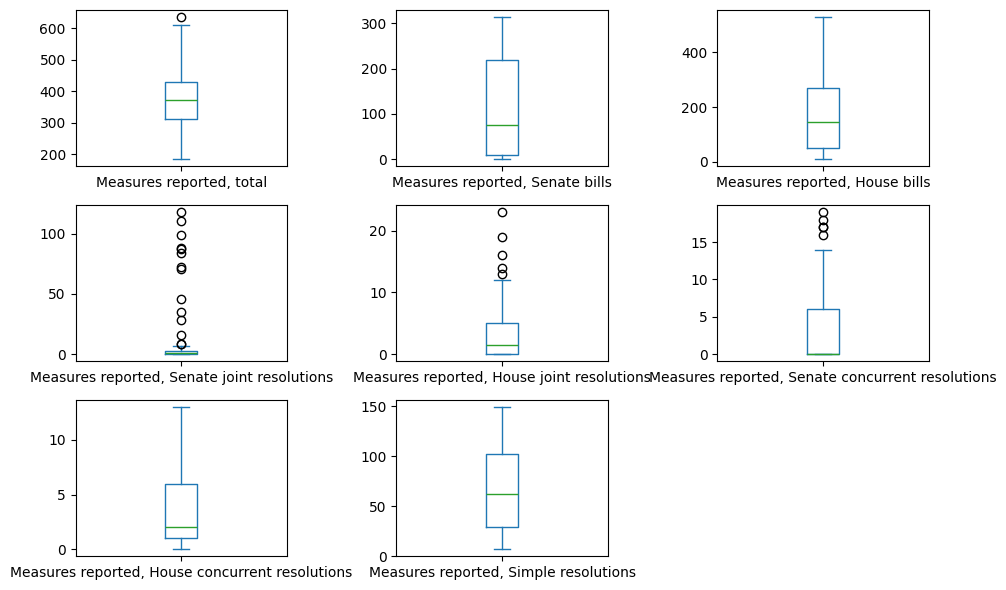

In [168]:
# Check for data outliers - Measures Reported
cols_to_plot = no_totals_df[no_totals_df.columns[no_totals_df.columns.str.startswith('Measures reported')]].columns.to_list()
no_totals_df[cols_to_plot].plot(kind='box', subplots=True, layout=(3,3), figsize=(10,6))
plt.tight_layout()
plt.show()

In [169]:
# Take a closer look at the numbers
no_totals_df[cols_to_plot].describe().astype('int')

,"Measures reported, total","Measures reported, Senate bills","Measures reported, House bills","Measures reported, Senate joint resolutions","Measures reported, House joint resolutions","Measures reported, Senate concurrent resolutions","Measures reported, House concurrent resolutions","Measures reported, Simple resolutions"
count,80,80,80,80,80,80,80,80
mean,374,111,170,11,3,3,3,67
std,101,107,124,28,4,5,3,40
min,185,0,10,0,0,0,0,7
25%,311,8,49,0,0,0,1,29
50%,372,76,146,1,1,0,2,62
75%,431,219,268,3,5,6,6,102
max,636,314,529,118,23,19,13,149


In [138]:
# Review outliers in Measures reported,total columns
temp_df = no_totals_df.sort_values('Measures reported, total', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures reported, total']].head()

,Congress,Session,Chamber,"Measures reported, total"
4,100,2,House,636.0
94,115,2,House,610.0
108,98,1,Senate,570.0
111,98,2,Senate,568.0
16,102,2,House,553.0


In [137]:
# Review outliers in Measures reported, Senate joint resolutions columns
temp_df = no_totals_df.sort_values('Measures reported, Senate joint resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures reported, Senate joint resolutions']].head()

,Congress,Session,Chamber,"Measures reported, Senate joint resolutions"
114,99,1,Senate,118.0
117,99,2,Senate,111.0
111,98,2,Senate,99.0
3,100,2,Senate,88.0
108,98,1,Senate,87.0


In [139]:
# Review outliers in Measures reported, House joint resolutions columns
temp_df = no_totals_df.sort_values('Measures reported, House joint resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures reported, House joint resolutions']].head()

,Congress,Session,Chamber,"Measures reported, House joint resolutions"
117,99,2,Senate,23.0
114,99,1,Senate,19.0
111,98,2,Senate,16.0
115,99,1,House,14.0
118,99,2,House,13.0


In [140]:
# Review outliers in Measures reported, Senate concurrent resolutions columns
temp_df = no_totals_df.sort_values('Measures reported, Senate concurrent resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures reported, Senate concurrent resolutions']].head()

,Congress,Session,Chamber,"Measures reported, Senate concurrent resolutions"
108,98,1,Senate,19.0
9,101,2,Senate,18.0
111,98,2,Senate,17.0
42,107,1,Senate,17.0
114,99,1,Senate,16.0


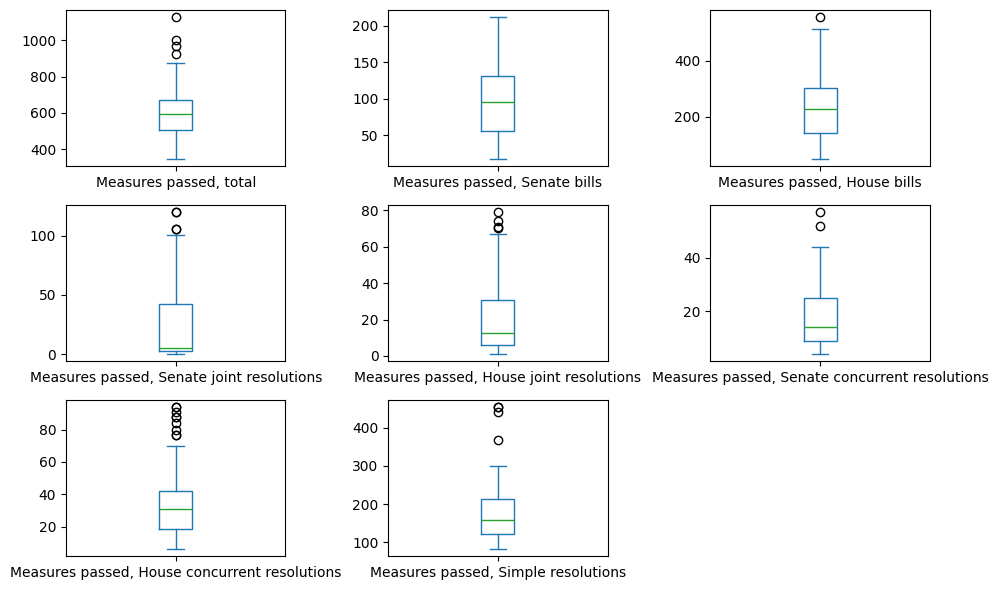

In [170]:
# Check for data outliers - Measures Passed
cols_to_plot = no_totals_df[no_totals_df.columns[no_totals_df.columns.str.startswith('Measures passed')]].columns.to_list()
no_totals_df[cols_to_plot].plot(kind='box', subplots=True, layout=(3,3), figsize=(10,6))
plt.tight_layout()
plt.show()

In [171]:
# Take a closer look at the numbers
no_totals_df[cols_to_plot].describe().astype('int')

,"Measures passed, total","Measures passed, Senate bills","Measures passed, House bills","Measures passed, Senate joint resolutions","Measures passed, House joint resolutions","Measures passed, Senate concurrent resolutions","Measures passed, House concurrent resolutions","Measures passed, Simple resolutions"
count,80,80,80,80,80,80,80,80
mean,609,99,233,24,22,17,35,175
std,149,51,113,35,22,11,22,79
min,346,17,48,0,1,4,6,82
25%,506,55,140,3,6,9,18,123
50%,597,96,226,5,12,14,31,158
75%,669,131,304,42,31,25,42,213
max,1127,212,557,120,79,57,94,454


In [141]:
# Review outliers in Measures passed, total columns
temp_df = no_totals_df.sort_values('Measures passed, total', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures passed, total']].head()

,Congress,Session,Chamber,"Measures passed, total"
61,110,1,House,1127.0
64,110,2,House,999.0
67,111,1,House,970.0
70,111,2,House,922.0
40,106,2,House,877.0


In [142]:
# Review outliers in Measures passed, House bills columns
temp_df = no_totals_df.sort_values('Measures passed, House bills', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures passed, total']].head()

,Congress,Session,Chamber,"Measures passed, House bills"
94,115,2,House,557.0
61,110,1,House,516.0
88,114,2,House,450.0
91,115,1,House,441.0
64,110,2,House,427.0


In [143]:
# Review outliers in Measures passed, Senate joint resolutions columns
temp_df = no_totals_df.sort_values('Measures passed, Senate joint resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures passed, Senate joint resolutions']].head()

,Congress,Session,Chamber,"Measures passed, Senate joint resolutions"
117,99,2,Senate,120.0
114,99,1,Senate,120.0
3,100,2,Senate,106.0
6,101,1,Senate,106.0
118,99,2,House,101.0


In [144]:
# Review outliers in Measures passed, House joint resolutions columns
temp_df = no_totals_df.sort_values('Measures passed, House joint resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures passed, House joint resolutions']].head()

,Congress,Session,Chamber,"Measures passed, House joint resolutions"
118,99,2,House,79.0
117,99,2,Senate,74.0
115,99,1,House,71.0
4,100,2,House,70.0
13,102,1,House,67.0


In [145]:
# Review outliers in Measures passed, Senate concurrent resolutions columns
temp_df = no_totals_df.sort_values('Measures passed, Senate concurrent resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures passed, Senate concurrent resolutions']].head()

,Congress,Session,Chamber,"Measures passed, Senate concurrent resolutions"
39,106,2,Senate,57.0
3,100,2,Senate,52.0
51,108,2,Senate,44.0
42,107,1,Senate,43.0
6,101,1,Senate,39.0


In [146]:
# Review outliers in Measures passed, House concurrent resolutions columns
temp_df = no_totals_df.sort_values('Measures passed, House concurrent resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures passed, House concurrent resolutions']].head()

,Congress,Session,Chamber,"Measures passed, House concurrent resolutions"
61,110,1,House,94.0
64,110,2,House,94.0
43,107,1,House,91.0
55,109,1,House,88.0
52,108,2,House,88.0


In [147]:
# Review outliers in Measures passed, Simple resolutions columns
temp_df = no_totals_df.sort_values('Measures passed, Simple resolutions', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Measures passed, Simple resolutions']].head()

,Congress,Session,Chamber,"Measures passed, Simple resolutions"
67,111,1,House,454.0
61,110,1,House,453.0
70,111,2,House,440.0
64,110,2,House,369.0
60,110,1,Senate,301.0


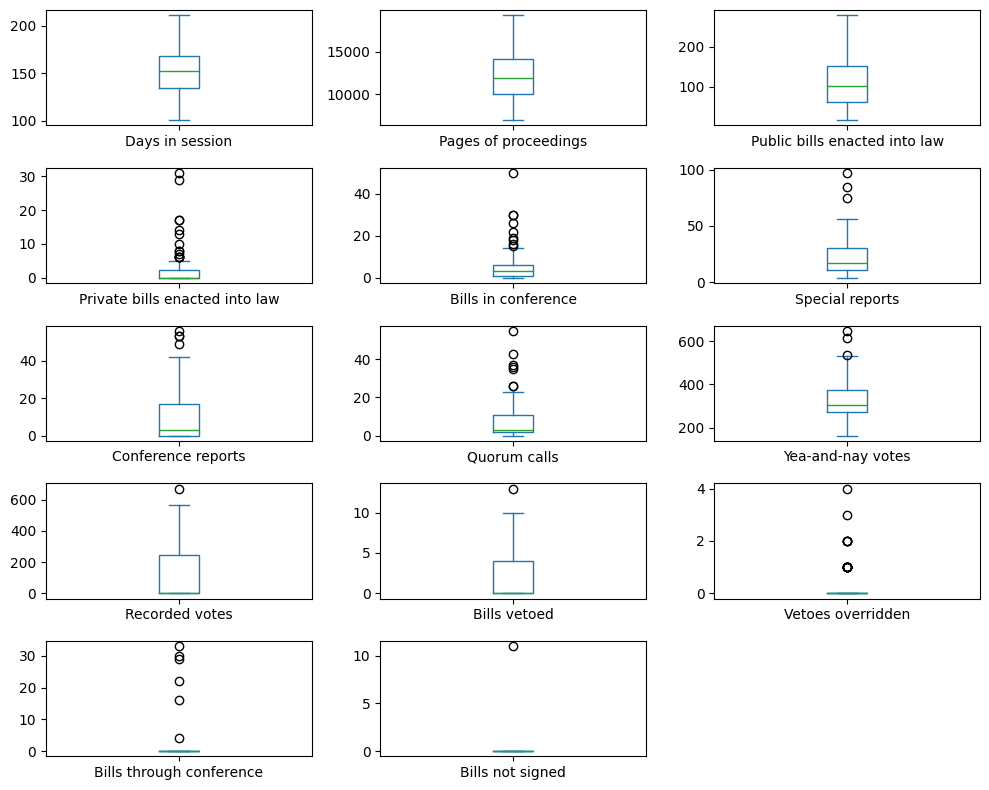

In [156]:
# Review outliers in remaining numeric columns
cols_to_plot = [x for x in no_totals_df.columns if x not in id_cols and not x.startswith('Measures')]
cols_to_plot.remove('Time in session')
cols_to_plot.remove('Extensions of remarks')
no_totals_df[cols_to_plot].plot(kind='box', subplots=True, layout=(5,3), figsize=(10,8))
plt.tight_layout()
plt.show()

In [172]:
# Take a closer look at the numbers
no_totals_df[cols_to_plot].describe().astype('int')

,"Measures passed, total","Measures passed, Senate bills","Measures passed, House bills","Measures passed, Senate joint resolutions","Measures passed, House joint resolutions","Measures passed, Senate concurrent resolutions","Measures passed, House concurrent resolutions","Measures passed, Simple resolutions"
count,80,80,80,80,80,80,80,80
mean,609,99,233,24,22,17,35,175
std,149,51,113,35,22,11,22,79
min,346,17,48,0,1,4,6,82
25%,506,55,140,3,6,9,18,123
50%,597,96,226,5,12,14,31,158
75%,669,131,304,42,31,25,42,213
max,1127,212,557,120,79,57,94,454


In [157]:
# Review outliers in Private bills enacted into law columns
temp_df = no_totals_df.sort_values('Private bills enacted into law', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Private bills enacted into law']].head()

,Congress,Session,Chamber,Private bills enacted into law
4,100,2,House,31.0
112,98,2,House,29.0
118,99,2,House,17.0
111,98,2,Senate,17.0
16,102,2,House,14.0


In [158]:
# Review outliers in Bills in conference columns
temp_df = no_totals_df.sort_values('Bills in conference', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Bills in conference']].head()

,Congress,Session,Chamber,Bills in conference
9,101,2,Senate,50.0
36,106,1,Senate,30.0
6,101,1,Senate,30.0
39,106,2,Senate,26.0
48,108,1,Senate,22.0


In [159]:
# Review outliers in Special reports columns
temp_df = no_totals_df.sort_values('Special reports', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Special reports']].head()

,Congress,Session,Chamber,Special reports
118,99,2,House,97.0
4,100,2,House,85.0
10,101,2,House,75.0
1,100,1,House,56.0
109,98,1,House,54.0


In [160]:
# Review outliers in Conference reports columns
temp_df = no_totals_df.sort_values('Conference reports', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Conference reports']].head()

,Congress,Session,Chamber,Conference reports
10,101,2,House,56.0
112,98,2,House,53.0
16,102,2,House,53.0
4,100,2,House,49.0
22,103,2,House,42.0


In [161]:
# Review outliers in Quorum calls columns
temp_df = no_totals_df.sort_values('Quorum calls', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Quorum calls']].head()

,Congress,Session,Chamber,Quorum calls
112,98,2,House,55.0
115,99,1,House,43.0
118,99,2,House,37.0
0,100,1,Senate,36.0
109,98,1,House,35.0


In [161]:
# Review outliers in Quorum calls columns
temp_df = no_totals_df.sort_values('Quorum calls', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Quorum calls']].head()

,Congress,Session,Chamber,Quorum calls
112,98,2,House,55.0
115,99,1,House,43.0
118,99,2,House,37.0
0,100,1,Senate,36.0
109,98,1,House,35.0


In [173]:
# Review outliers in Yea-and-nay votes columns
temp_df = no_totals_df.sort_values('Yea-and-nay votes', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Yea-and-nay votes']].head()

,Congress,Session,Chamber,Yea-and-nay votes
61,110,1,House,648.0
24,104,1,Senate,613.0
67,111,1,House,535.0
106,117,2,House,532.0
102,117,1,Senate,528.0


In [174]:
# Review outliers in Recorded votes columns
temp_df = no_totals_df.sort_values('Recorded votes', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Recorded votes']].head()

,Congress,Session,Chamber,Recorded votes
73,112,1,House,671.0
25,104,1,House,568.0
61,110,1,House,529.0
67,111,1,House,452.0
76,112,2,House,412.0


In [175]:
# Review outliers in Bills vetoed columns
temp_df = no_totals_df.sort_values('Bills vetoed', ascending=False)
temp_df[['Congress', 'Session', 'Chamber', 'Bills vetoed']].head()

,Congress,Session,Chamber,Bills vetoed
16,102,2,House,13.0
118,99,2,House,10.0
4,100,2,House,10.0
7,101,1,House,9.0
112,98,2,House,9.0


***
<font color='blue'>**Note:**</font>  
Outlier data was confirmed against original PDF downloads for OCR or data prep errore, and no issues were found.

***
## Validate Congressional Totals
***

In [208]:
# Create a dataframe that includes only rows where Chamber equals Total
totals_df = leg_act_df[leg_act_df['Chamber'] == 'Total'].copy()
totals_df.drop(columns=['Start Date', 'End Date'], inplace=True)

In [247]:
# Identify columns that contain data
cols = totals_df.columns[(totals_df!=0).any()].to_list()
cols.remove('Chamber')
cols.remove('Congress')
cols.remove('Session')
print(cols)

['Pages of proceedings', 'Extensions of remarks', 'Public bills enacted into law', 'Private bills enacted into law', 'Bills in conference', 'Measures passed, total', 'Measures reported, total', 'Measures introduced, total', 'Bills vetoed', 'Vetoes overridden', 'Bills through conference']


In [267]:
# Validate totals are equal to House + Senate
valid = True
for col in cols:
    for cong in leg_act_df['Congress'].unique():
        for sess in range(1, 3):
            pub_tot = totals_df[(totals_df['Congress'] == cong) & (totals_df['Session'] == sess)][col].values[0]
            calc_tot = no_totals_df[(no_totals_df['Congress'] == cong) & (no_totals_df['Session'] == sess)][col].sum()
            if pub_tot > 0 and calc_tot > 0:
                if pub_tot != calc_tot:
                    print(f'Error: {cong},{sess} {col}\nPublished total: {pub_tot}      Calculated total: {calc_tot}')
                    valid = False
if valid:
    print('No errors found')

Error: 103,1 Pages of proceedings
Published total: 18243.0      Calculated total: 28243.0
Error: 98,2 Pages of proceedings
Published total: 26896.0      Calculated total: 26941.0
Error: 98,2 Private bills enacted into law
Published total: 41.0      Calculated total: 46.0
Error: 102,2 Bills in conference
Published total: 7.0      Calculated total: 6.0
Error: 103,1 Measures passed, total
Published total: 1010.0      Calculated total: 1020.0
Error: 106,1 Measures reported, total
Published total: 795.0      Calculated total: 798.0
Error: 102,1 Bills vetoed
Published total: 3.0      Calculated total: 2.0
Error: 99,2 Vetoes overridden
Published total: 1.0      Calculated total: 2.0


***
**End**
***